In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
from astropy.io import fits

import matplotlib.pyplot as plt
import seaborn as sns

from lvmdap.analysis.plotting import plot_triang_pdfs

sns.set(context="talk", style="ticks", palette="colorblind", color_codes=True, font_scale=1)

In [2]:
# from pyFIT3D.modelling.gas import _voigt_model
# from astropy.modeling.functional_models import Voigt1D

# wl = np.arange(4861.3200-100, 100+4861.3200, 1)

# # hb = Voigt1D(4861.32*(1+0/3e5), 1, 2.355*2.6000, 2.355*7.5000)(wl)
# # hb *= 10000/np.trapz(hb, wl)

# hb = _voigt_model([4861.32, 10000, 2.6000, 7.5, 4400], wl)

# plt.plot(wl, hb, '-k')
# np.trapz(hb, wl)

In [3]:
OUTPUT_PATH = "../../_fitting-data/outputs"

LABEL = "orion-test"
LABEL = "gsd01-1p00000_1p12200gyr"
LABEL = "test-v2"

fitting = pd.read_csv(f"{OUTPUT_PATH}/coeffs_{LABEL}", sep="\t", skiprows=1, index_col="ID", names="ID	TEFF	LOGG	META	COEFF	MinCoeff	logML	AV	NCoeff	Errs".split())
fitting

,TEFF,LOGG,META,COEFF,MinCoeff,logML,AV,NCoeff,Errs
ID,,,,,,,,,
0,3.9970,2.5946,-1.0825,0.0,0.0,14.0274,0.0,0.0,0.0
1,3.9833,3.8164,-2.2742,0.0,0.0,11.1034,0.0,0.0,0.0
2,3.9865,3.3665,-1.7064,0.0,0.0,10.9304,0.0,0.0,0.0
3,3.9973,3.5769,-1.4049,0.0,0.0,11.7437,0.0,0.0,0.0
4,4.0082,4.0227,-1.5766,0.0,0.0,11.5772,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,3.4789,0.5479,-0.6864,0.0,0.0,12.7137,0.0,0.0,0.0
96,3.4744,0.7093,-0.2107,0.0,0.0,14.1032,0.0,0.0,0.0
97,3.5082,1.6716,-0.3469,0.0,0.0,14.3016,0.0,0.0,0.0


In [4]:
elines = {4101.0: r"$\text{H}\delta$", 4340.468: r"$\text{H}\gamma$", 4861.32: r"$\text{H}\beta$", 4958.91: r"$[\text{O}\textsc{iii}]\lambda4959$",
          5006.84: r"$[\text{O}\textsc{iii}]\lambda5007$", 6562.817: r"$\text{H}\alpha$", 6583.6: r"$[\text{N}\textsc{ii}]\lambda6584$",
          6716.47: r"$[\text{S}\textsc{ii}]\lambda6717$", 6730.85: r"$[\text{S}\textsc{ii}]\lambda6731$"}

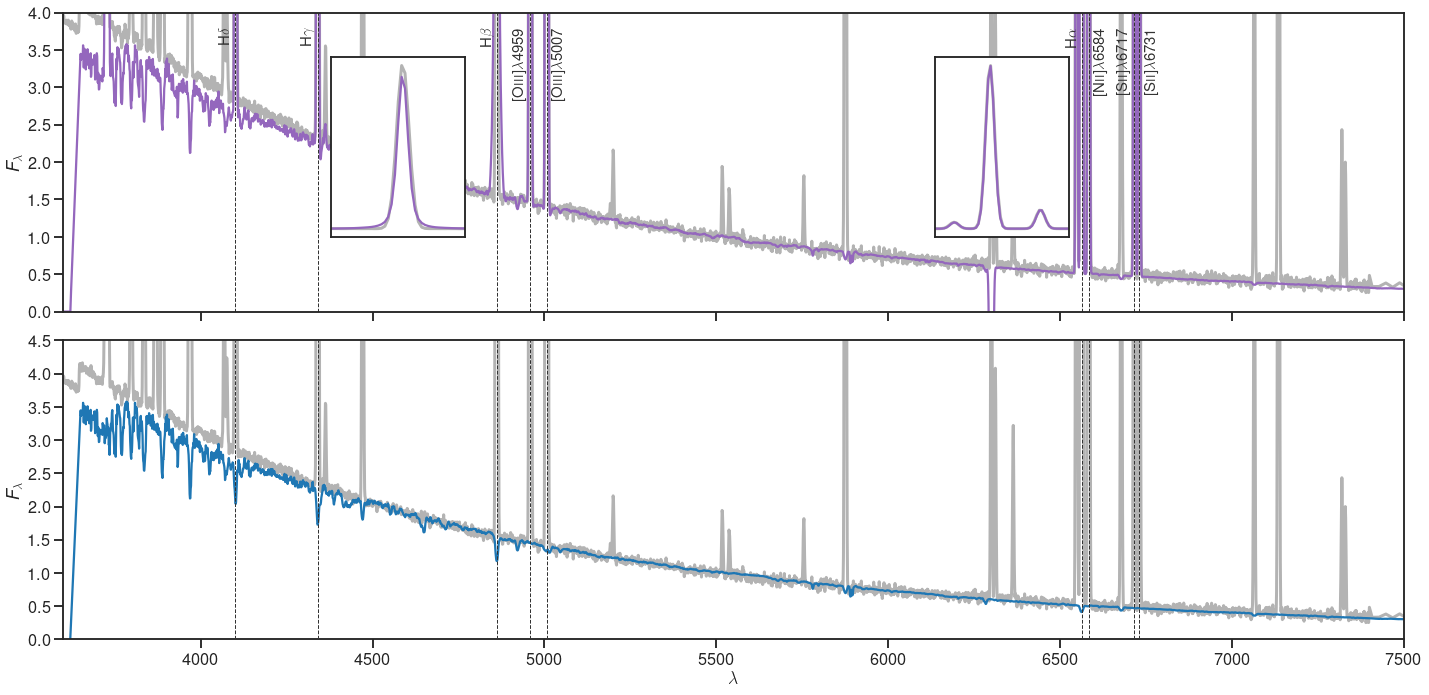

In [14]:
models = fits.open(f"{OUTPUT_PATH}/output.{LABEL}.fits.gz")
models[0].header

wl = np.array([models[0].header["CRVAL1"] + (i*models[0].header["CDELT1"]) for i in range(models[0].header["NAXIS1"])])
fl_o = models[0].data[0]
fl_m = models[0].data[1]
fl_j = models[0].data[2]
fl_g = models[0].data[3]
fl_r = models[0].data[4]
fl_n = models[0].data[5]

fig, (ax1,ax2) = plt.subplots(2, figsize=(20,10), sharex=True, sharey=False)
plt.xlim(3600,7500)

# plt.xlim(4580,5100)
# plt.xlim(6400,6800)

mask_a1 = (3600<=wl)&(wl<=7500)
ax1.plot(wl[mask_a1], fl_o[mask_a1], "-", color="0.7", lw=3)
ax1.plot(wl[mask_a1], fl_j[mask_a1], "-", color="tab:purple")
ax1.set_ylim(0,4)
ax1.set_ylabel(r"$F_\lambda$")
_, ymax = ax1.get_ylim()
for ewl in elines:
    ax1.axvline(ewl, ls="--", lw=1, color="0.2")
    ax2.axvline(ewl, ls="--", lw=1, color="0.2", zorder=999)
    if ewl in [5006.84, 6583.6, 6730.85]:
        ax1.text(ewl+17, ymax-ymax*0.05, elines[ewl], ha="left", va="top", fontsize="small", rotation=90, color="0.2")
    else:
        ax1.text(ewl-8, ymax-ymax*0.05, elines[ewl], ha="right", va="top", fontsize="small", rotation=90, color="0.2")

axins1 = ax1.inset_axes([0.20, 0.25, 0.1, 0.6])
axins1.set_xlim(4840,4880)
mask_ai1 = (4840<=wl)&(wl<=4880)
axins1.plot(wl[mask_ai1], fl_o[mask_ai1], "-", color="0.7", lw=3)
axins1.plot(wl[mask_ai1], fl_j[mask_ai1], "-", color="tab:purple")
# axins1.set_ylim(0,5)
axins1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
# ax1.indicate_inset_zoom(axins1)

axins2 = ax1.inset_axes([0.65, 0.25, 0.1, 0.6])
# axins2.set_xlim(6700,6750)
# mask_ai2 = (6700<=wl)&(wl<=6750)
axins2.set_xlim(6540,6595)
mask_ai2 = (6540<=wl)&(wl<=6595)
axins2.plot(wl[mask_ai2], fl_o[mask_ai2], "-", color="0.7", lw=3)
axins2.plot(wl[mask_ai2], fl_j[mask_ai2], "-", color="tab:purple")
# axins2.set_ylim(0,1.5)
axins2.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
# ax1.indicate_inset_zoom(axins2)

ax2.plot(wl[mask_a1], (fl_o)[mask_a1], "-", color="0.7", lw=3)
ax2.plot(wl[mask_a1], (fl_o-fl_g)[mask_a1], "-", color="tab:blue")
ax2.set_ylim(0,4.5)
ax2.set_xlabel(r"$\lambda$")
ax2.set_ylabel(r"$F_\lambda$")

fig.tight_layout()
fig.savefig("good-fit.png", bbox_inches="tight")

In [6]:
# stellar_basis = fits.open("../../_fitting-data/_basis/stellar-basis-spectra-miles-indous.fits.gz")
# stellar_param = fits.open("../../_fitting-data/_basis/stellar-basis-params-miles-indous.fits.gz")

# stellar_basis = fits.open("../../_fitting-data/_basis/stellar-basis-spectra-28-miles-indous.fits.gz")
# stellar_param = fits.open("../../_fitting-data/_basis/stellar-basis-params-28-miles-indous.fits.gz")

# stellar_basis = fits.open("../../_fitting-data/_basis/stellar-basis-spectra-119-miles-indous-mastar.fits.gz")
# stellar_param = fits.open("../../_fitting-data/_basis/stellar-basis-params-119-miles-indous-mastar.fits.gz")

# stellar_basis = fits.open("../../_fitting-data/_basis/stellar-basis-spectra-110-miles-indous-mastar.fits.gz")
# stellar_param = fits.open("../../_fitting-data/_basis/stellar-basis-params-110-miles-indous-mastar.fits.gz")

# stellar_basis = fits.open("../../_fitting-data/_basis/stellar-basis-spectra-83-mastar.fits.gz")
# stellar_param = fits.open("../../_fitting-data/_basis/stellar-basis-params-83-mastar.fits.gz")

stellar_basis = fits.open("../../_fitting-data/_basis_mastar_v2/stellar-basis-spectra-100.fits.gz")
stellar_param = fits.open("../../_fitting-data/_basis_mastar_v2/stellar-basis-params-100.fits.gz")

# plt.plot(np.array([stellar_basis[0].header["CRVAL1"] + (i*stellar_basis[0].header["CDELT1"]) for i in range(stellar_basis[0].header["NAXIS1"])]), stellar_basis[0].data[3])
# plt.xlim(3850, 6750)

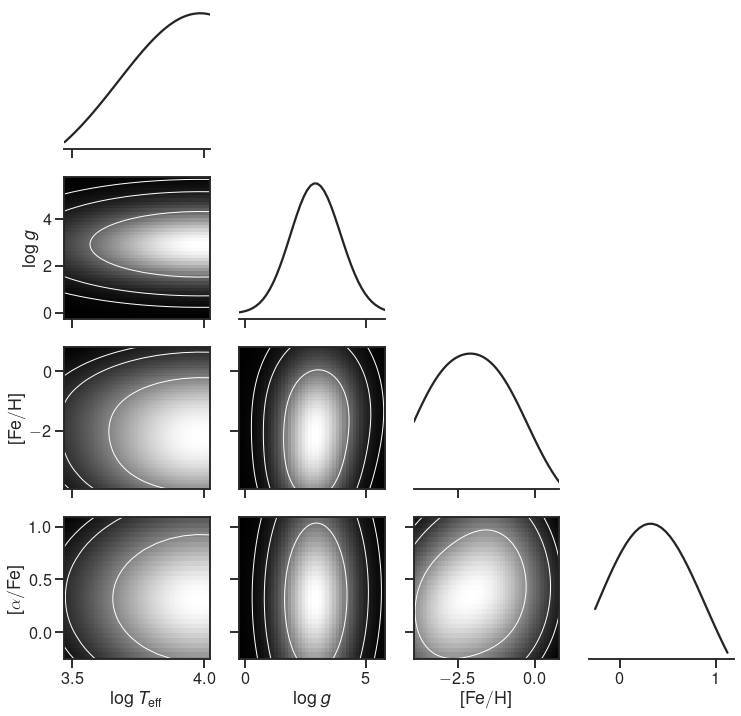

In [13]:
fig = plot_triang_pdfs(stellar_param, coeffs=fitting.COEFF, cmap="binary_r")
plt.savefig("good-params.png", bbox_inches="tight")

In [8]:
!ls ../../_fitting-data/_isochrones/

isoc_z0.0040.dat.txt  isoc_z0.0200.dat.txt
isoc_z0.0080.dat.txt  isoc_z0.0300.dat.txt


In [9]:
# read available isochrones
def read_isochrones(filenames):
    if hasattr(filenames, "__len__") and not isinstance(filenames, str):
        filenames_ = filenames
    elif isinstance(filenames, str):
        filenames_ = [filenames]
    else:
        raise ValueError(f"'filenames' should be either a string or a list of strings. Got {type(filenames)}")
    
    isochrones = []
    for filename in filenames_:
        with open(filename, "r") as f:
            header = f.readline().strip("# ").split()
            isochrones += [pd.read_csv(f, sep=" ", names=header, comment="#")]
    return pd.concat(isochrones)
# interpolate the Teff vs Log(g) in the grid defined by the stellar basis
# map the PDF in this space to the space of initial stellar mass and ages
# compare initial mass to the expected IMF
# compare the age distribution to the expected ages

In [10]:
read_isochrones([
    "../../_fitting-data/_isochrones/isoc_z0.0040.dat.txt",
    "../../_fitting-data/_isochrones/isoc_z0.0080.dat.txt",
    "../../_fitting-data/_isochrones/isoc_z0.0200.dat.txt",
    "../../_fitting-data/_isochrones/isoc_z0.0300.dat.txt"
])

,log(age),Mini,Mact,logl,logt,logg,Composition,Phase
0,5.5,0.090000,0.0900,-0.9880,3.4971,3.3206,0.4787,0.0
1,5.5,0.095634,0.0956,-0.9488,3.4997,3.3182,0.4787,0.0
2,5.5,0.100648,0.1006,-0.9154,3.5019,3.3159,0.4787,0.0
3,5.5,0.115942,0.1159,-0.8177,3.5086,3.3065,0.4787,0.0
4,5.5,0.120000,0.1200,-0.7962,3.5102,3.3063,0.4787,0.0
...,...,...,...,...,...,...,...,...
47877,10.1,1.021794,0.5484,3.5891,3.5215,-0.3738,0.4666,5.0
47878,10.1,1.021795,0.5458,3.5908,3.5258,-0.3604,0.4666,5.0
47879,10.1,1.021795,0.5432,3.5924,3.5301,-0.3470,0.4666,5.0
47880,10.1,1.021795,0.5405,3.5941,3.5344,-0.3335,0.4666,5.0


In [11]:
def build_isochrone_support(isocrones, pdf_params_hdus):
    # define grid in logg, teff and met from the parameter PDFs
    # interpolate the isochrone space in the parameter PDFs
    h = pdf_params_hdus[ihdu].header
    teff_grid, logg_grid = np.array([h["CRVAL1"] + i*h["CDELT1"] for i in range(h["NAXIS1"])]), np.array([h["CRVAL2"] + i*h["CDELT2"] for i in range(h["NAXIS2"])])
    
    X, Y = np.meshgrid(teff_grid, logg_grid)
    
    
    CloughTocher2DInterpolator(
        np.column_stack((X.flatten(), Y.flatten())),
    )

Text(0, 0.5, '$\\log{g}$')

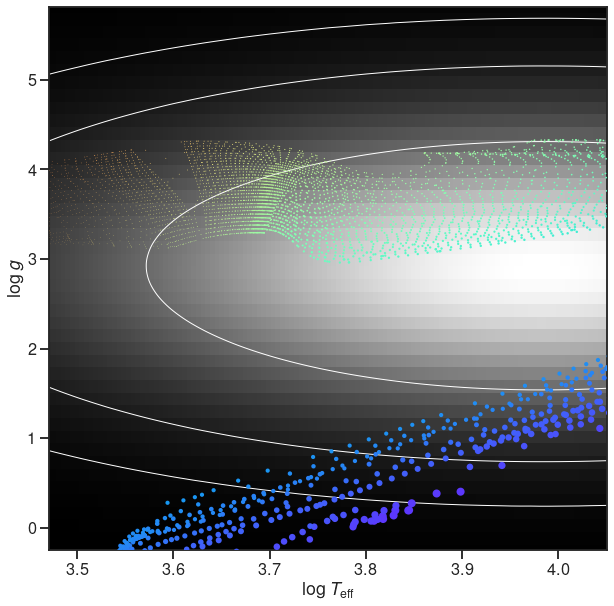

In [12]:
from scipy.interpolate import CloughTocher2DInterpolator
from lvmdap.analysis.stats import weighted_pdf
from lvmdap.analysis.plotting import contours_from_pdf
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.figure(figsize=(10,10))

# read isochrones
f = open("../../_fitting-data/_isochrones/isoc_z0.0200.dat.txt")
# f = open("../../_fitting-data/_isochrones/isoc_z0.0040.dat.txt")
header = f.readline().strip("# ").split()
iso = pd.read_csv(f, sep=" ", names=header, comment="#")
iso.head()

labels = {"TEFF":r"$\log{T_\text{eff}}$", "LOGG":r"$\log{g}$", "MET":r"$[\text{Fe}/\text{H}]$", "ALPHAM":r"$[\alpha/\text{Fe}]$"}

pdf_params_hdus = stellar_param
coeffs = fitting.COEFF
ihdu = 1

wPDF, x_scale, y_scale = weighted_pdf(pdf_params_hdus, ihdu, coeffs=coeffs)

X, Y = np.meshgrid(x_scale, y_scale)
wPDF_func = CloughTocher2DInterpolator(np.column_stack((X.flatten(),Y.flatten())), wPDF.flatten())
levels, X_, Y_, PDF_ = contours_from_pdf(
    lambda x, y: wPDF_func(np.column_stack((x,y))),
    range_x=x_scale[[0,-1]],
    range_y=y_scale[[0,-1]],
    deltas=0.01, return_grid=True
)

gr = iso.groupby("log(age)")
ages = list(gr.groups.keys())
for age in ages:
    if float(age) > 7 or float(age) < 5: continue
    isochrone = gr.get_group(age)
    plt.scatter(isochrone["logt"], isochrone["logg"], c=isochrone["logl"], s=isochrone["Mini"], lw=0, zorder=99, vmin=iso.logl.min(), vmax=iso.logl.max(), cmap=plt.cm.rainbow_r)

x_name = pdf_params_hdus[ihdu].header["CTYPE1"]
y_name = pdf_params_hdus[ihdu].header["CTYPE2"]

pcm = plt.pcolormesh(X, Y, wPDF, cmap="binary_r", shading="auto")
plt.contour(X_, Y_, PDF_, levels=levels, colors="w", linestyles="-", linewidths=1)

plt.xlim(X_.min(), X_.max())
plt.ylim(Y_.min(), Y_.max())
plt.xlabel(labels[x_name])
plt.ylabel(labels[y_name])